In [341]:
import pandas as pd

def load_data(filepath):
    """
    Charge les données du fichier CSV.
    """
    return pd.read_csv(filepath)

# Utilisation de la fonction
file_path = 'data/1v1.csv'  # Assurez-vous que ce chemin est correct
data = load_data(file_path)


In [342]:
def get_win_rates(data, champion, min_matches=50):
    """
    Calcule le taux de victoire des adversaires contre un champion donné.
    """
    # Filtrer les matchs où le champion choisi est soit champ1 soit champ2
    matches = data[(data['champ1'] == champion) | (data['champ2'] == champion)]
    
    # Calculer les taux de victoire
    win_rates = {}
    for _, row in matches.iterrows():
        if row['champ1'] == champion:
            opponent = row['champ2']
            win = 1 if row['win'] == 0 else 0
        else:
            opponent = row['champ1']
            win = row['win']

        if opponent not in win_rates:
            win_rates[opponent] = {'wins': 0, 'total': 0}
        
        win_rates[opponent]['wins'] += win
        win_rates[opponent]['total'] += 1

    # Filtrer pour garder seulement les champions avec un nombre minimum de matchs
    win_rates = {champ: stats for champ, stats in win_rates.items() if stats['total'] >= min_matches}

    # Calculer le pourcentage de victoire
    for champ in win_rates:
        win_rates[champ]['win_rate'] = win_rates[champ]['wins'] / win_rates[champ]['total']

    return win_rates


In [343]:
# Demander à l'utilisateur de saisir un champion
champion = input("Entrez le nom d'un champion : ")

In [344]:
def top_counter_champions(data, champion, top_n=5):
    """
    Retourne les champions ayant les meilleurs taux de victoire contre le champion choisi.
    """
    win_rates = get_win_rates(data, champion)
    sorted_champs = sorted(win_rates.items(), key=lambda x: x[1]['win_rate'], reverse=True)
    return sorted_champs[:top_n]

In [345]:
# Trouver et afficher les 5 meilleurs champions contre le champion choisi
top_counters = top_counter_champions(data, champion)
print(f"Les 5 meilleurs champions contre {champion} sont :")
for champ, stats in top_counters:
    print(f"{champ} avec un taux de victoire de {stats['win_rate'] * 100:.2f}%")

Les 5 meilleurs champions contre DrMundo sont :
RekSai avec un taux de victoire de 66.13%
Malphite avec un taux de victoire de 60.43%
Ivern avec un taux de victoire de 59.62%
Camille avec un taux de victoire de 59.06%
Nocturne avec un taux de victoire de 58.39%


In [346]:
import pandas as pd

# Charger les données des champions à partir du fichier CSV
data_champions = pd.read_csv('data/Champions_LoL_Reorganized.csv')

# Ensuite, exécutez le code précédent pour calculer les moyennes
top_counters = ['RekSai', 'Malphite', 'Ivern', 'Camille', 'Nocturne']
top_counters_data = data_champions[data_champions['Nom du Champion'].isin(top_counters)]
mean_ratings = top_counters_data.mean(numeric_only=True)

mean_ratings


Id             67.6
Ad              5.4
Ap              2.2
Early           3.8
MidGame         7.6
Lategame        7.6
Snowball        4.8
Escarmouche     7.6
Teamfight       6.0
CC              7.4
Burst           6.4
Dps             2.6
Range           4.6
Mobilité        4.0
SplitPush       4.8
dtype: float64

In [347]:
import seaborn as sns
import matplotlib.pyplot as plt

In [348]:
print(data_champions.columns)


Index(['Nom du Champion', 'Id', 'Rôle principal', 'Ad', 'Ap', 'Early',
       'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC',
       'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush'],
      dtype='object')


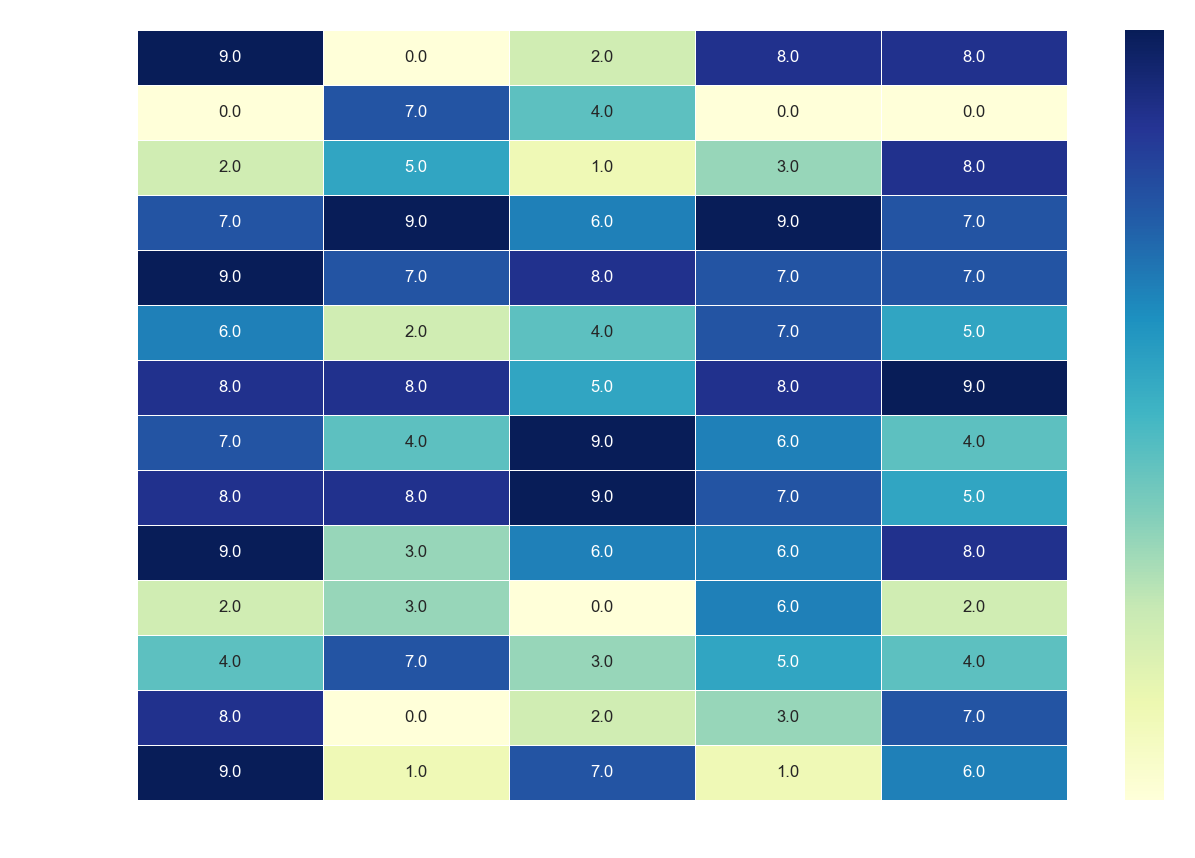

In [349]:
# Charger votre DataFrame
data = pd.read_csv('data/Champions_LoL_Reorganized.csv')

# Filtrer les données pour ne garder que les champions sélectionnés
selected_champions = data[data['Nom du Champion'].isin(top_counters)]

# Liste des attributs à comparer
attributes = ['Ad', 'Ap', 'Early', 'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC', 'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush']

# Sélectionner les attributs pour les champions sélectionnés
selected_attributes = selected_champions.set_index('Nom du Champion')[attributes].T

# Créer un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(selected_attributes, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=.5)
plt.title('Comparaison des Attributs des Champions Sélectionnés')
plt.ylabel('Attributs')
plt.xlabel('Champions')
plt.show()


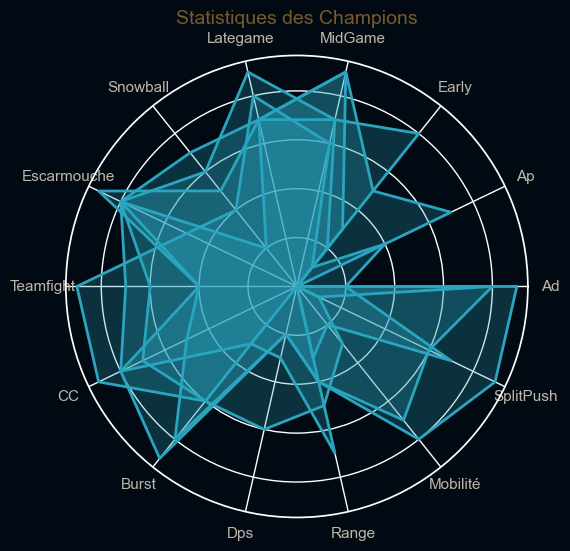

In [350]:
import numpy as np
from math import pi


# Filtrer les données pour les champions sélectionnés
selected_champions = data[data['Nom du Champion'].isin(top_counters)]

# Définir les attributs à comparer
attributes = ['Ad', 'Ap', 'Early', 'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC', 'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush']

# Création d'un diagramme radar pour tous les champions sélectionnés
num_vars = len(attributes)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Définir les couleurs
background_color = '#010A13'
text_color = '#785A28'
label_color = '#BFB7A7'
line_and_fill_color = '#2AA5BF'  # Couleur des lignes et du remplissage en bleu

# Création du graphique
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

# Ajouter les données de chaque champion au diagramme radar
for i, (idx, row) in enumerate(selected_champions.iterrows()):
    values = row[attributes].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, color=line_and_fill_color, label=row['Nom du Champion'])
    ax.fill(angles, values, color=line_and_fill_color, alpha=0.25)  # Remplissage en bleu avec une transparence

# Personnaliser les étiquettes et les axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes, color=label_color)
ax.set_yticklabels([])

# Personnaliser le titre
plt.title('Statistiques des Champions', color=text_color, fontsize=14)

# Ajout d'une légende
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.legend().remove() 
plt.show()


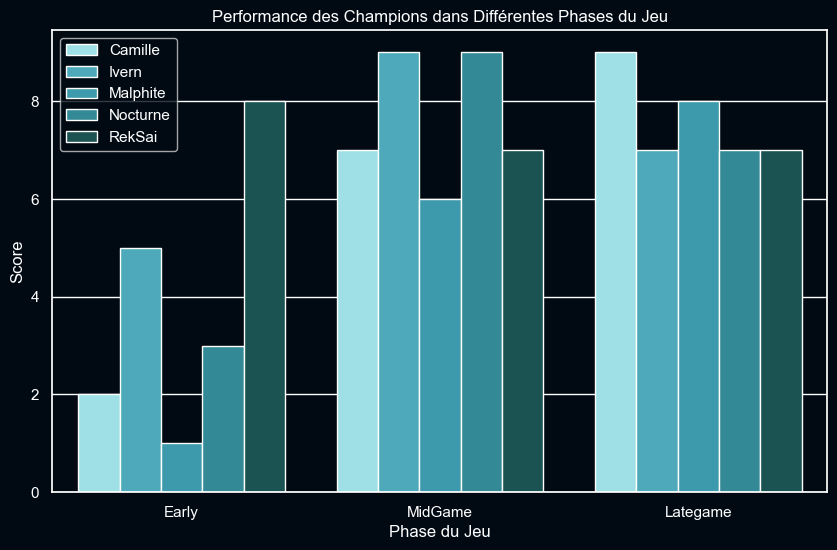

In [351]:
base_color = '#2AA5BF'
background_color = '#010A13'
color_variants = [ '#93EAF2' ,'#3CB7CC', '#2AA5BF', '#2495A6', '#105D5B']
phases = ['Early', 'MidGame', 'Lategame']

plt.figure(figsize=(10, 6), facecolor=background_color)

# Utilisation de la palette de couleurs dans le graphique en barres
sns.barplot(data=selected_champions.melt(id_vars='Nom du Champion', value_vars=phases),
            x='variable', y='value', hue='Nom du Champion', palette=color_variants)

# Définir l'arrière-plan des axes
plt.gca().set_facecolor(background_color)

plt.title('Performance des Champions dans Différentes Phases du Jeu', color='white')
plt.xlabel('Phase du Jeu', color='white')
plt.ylabel('Score', color='white')

# Changer la couleur des légendes et des ticks pour une meilleure visibilité
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(facecolor=background_color)

plt.show()


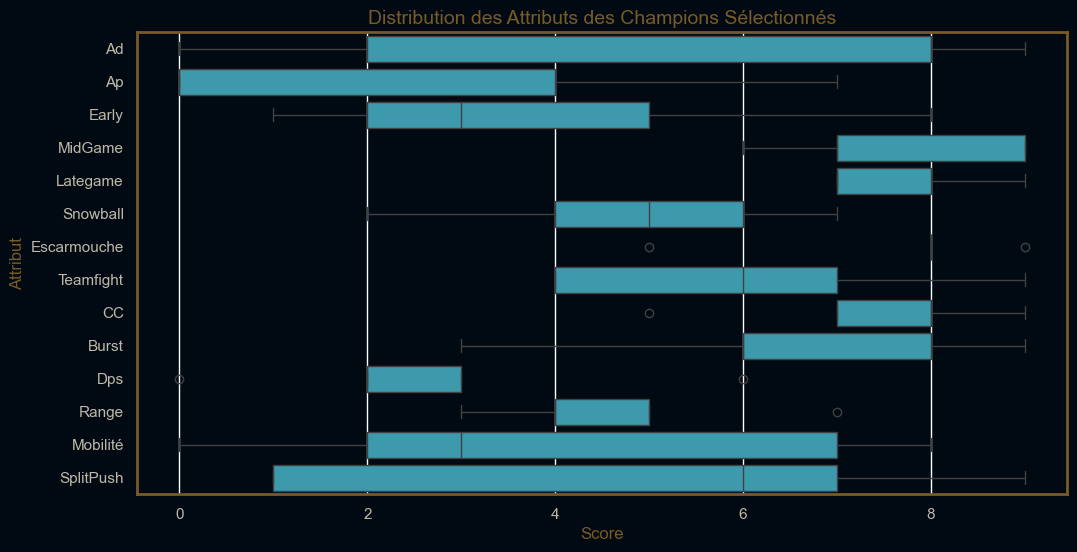

In [352]:
# Définir les couleurs
bar_color = "#2AA5BF"
background_color = '#010A13'
text_color = '#785A28'
label_color = '#BFB7A7'

# Création du graphique boxplot
plt.figure(figsize=(12, 6))
box = sns.boxplot(data=selected_champions[attributes], orient='h', color=bar_color)

# Personnaliser le fond et les bordures du graphique
box.figure.patch.set_facecolor(background_color)
box.axes.set_facecolor(background_color)
for spine in box.spines.values():
    spine.set_color(text_color)
    spine.set_linewidth(2)

# Personnaliser les titres et étiquettes
plt.title('Distribution des Attributs des Champions Sélectionnés', color=text_color, fontsize=14)
plt.xlabel('Score', color=text_color, fontsize=12)
plt.ylabel('Attribut', color=text_color, fontsize=12)  # Ajouter un label pour l'axe des y si nécessaire

# Personnaliser les étiquettes des axes
plt.xticks(color=label_color)
plt.yticks(color=label_color)

# Afficher le graphique
plt.show()

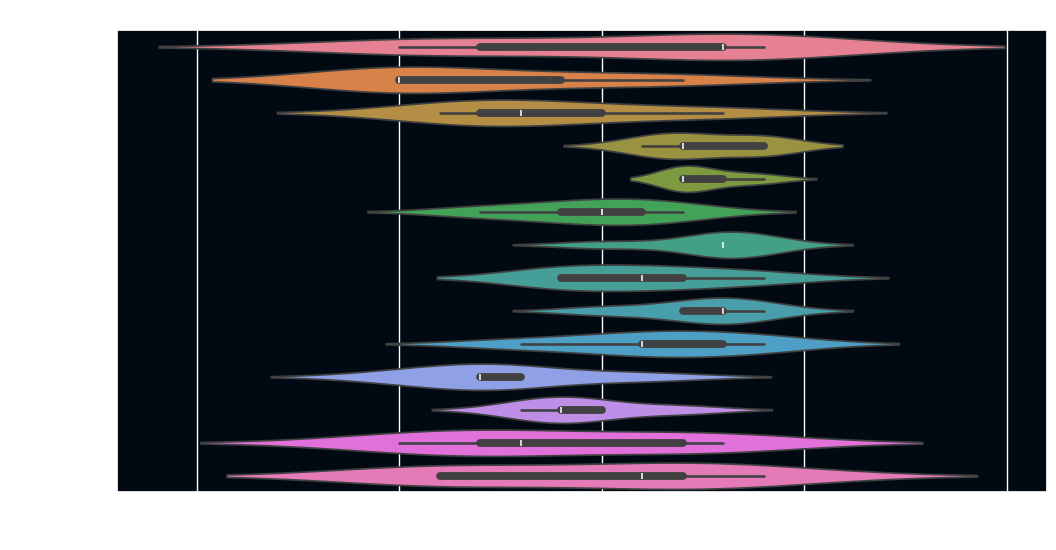

In [353]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=selected_champions[attributes], orient='h')
plt.title('Distribution et Densité des Attributs des Champions Sélectionnés')
plt.xlabel('Score')
plt.show()


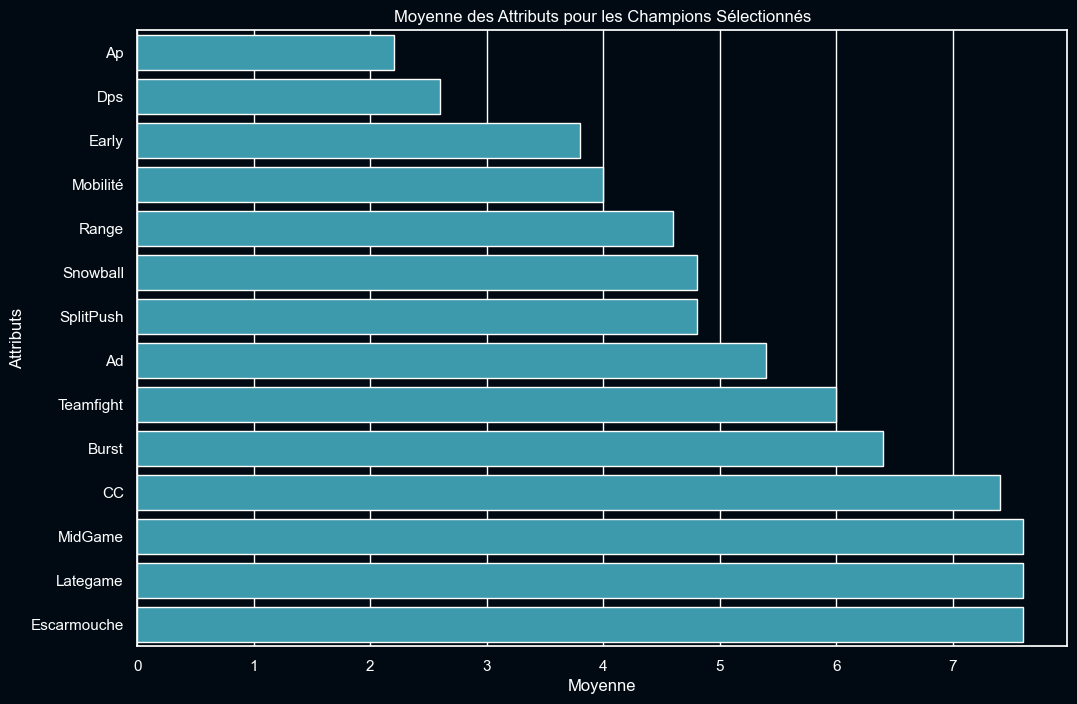

In [354]:
# Couleurs personnalisées
bar_color = "#2AA5BF"
background_color = '#010A13'
text_color = '#785A28'
label_color = '#BFB7A7'
white_color = 'white'  # Nouvelle couleur pour les attributs en blanc

# Définir le style de Seaborn
sns.set_style("darkgrid", {"axes.facecolor": background_color})
sns.set_palette([bar_color])
sns.set_context("notebook", rc={"xtick.color": white_color, "ytick.color": white_color,
                                "axes.labelcolor": label_color})

# Créer la figure avec la couleur de fond personnalisée
fig = plt.figure(figsize=(12, 8), facecolor=background_color)

mean_attributes = selected_champions[attributes].mean().sort_values()
sns.barplot(x=mean_attributes.values, y=mean_attributes.index, color=bar_color)
plt.title('Moyenne des Attributs pour les Champions Sélectionnés', color=white_color)
plt.xlabel('Moyenne', color=white_color)
plt.ylabel('Attributs', color=white_color)  # Définir la couleur du texte des attributs en blanc
plt.xticks(color=white_color)
plt.yticks(color=white_color)  # Définir la couleur du texte des attributs en blanc

# Afficher la figure
plt.show()

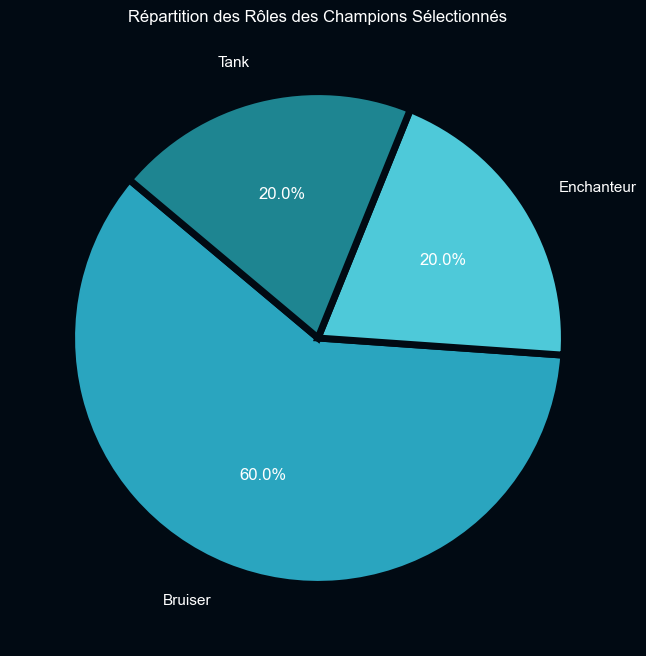

In [355]:
# Définir les couleurs
background_color = '#010A13'
text_color = '#FFFFFF'
colors = ['#2AA5BF', '#4EC9D9', '#1E8591']


# Configuration des couleurs de base pour le graphique
plt.rcParams['text.color'] = text_color
plt.rcParams['axes.labelcolor'] = text_color
plt.rcParams['xtick.color'] = text_color
plt.rcParams['ytick.color'] = text_color

# Création du graphique
plt.figure(figsize=(8, 8), facecolor=background_color)

role_counts = selected_champions['Rôle principal'].value_counts()
plt.pie(role_counts, labels=role_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, 
        labeldistance=1.15, wedgeprops={'linewidth': 5, 'edgecolor': '#010A13'})



# Titre du graphique avec la couleur personnalisée
plt.title('Répartition des Rôles des Champions Sélectionnés', color=text_color)

# Affichage du graphique
plt.show()

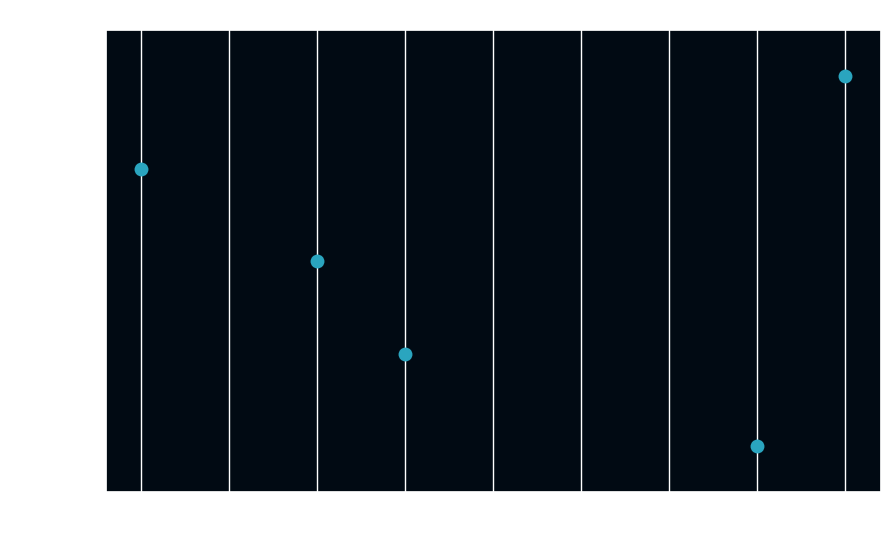

In [356]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=selected_champions, x='Mobilité', y='Nom du Champion', jitter=True, size=10)
plt.title('Répartition de la Mobilité des Champions Sélectionnés')
plt.xlabel('Mobilité')
plt.show()


C:\Users\yifor\AppData\Local\Temp\ipykernel_14184\1052501341.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=selected_champions, x='Dps', shade=True, label='DPS')
C:\Users\yifor\AppData\Local\Temp\ipykernel_14184\1052501341.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=selected_champions, x='Burst', shade=True, label='Burst')


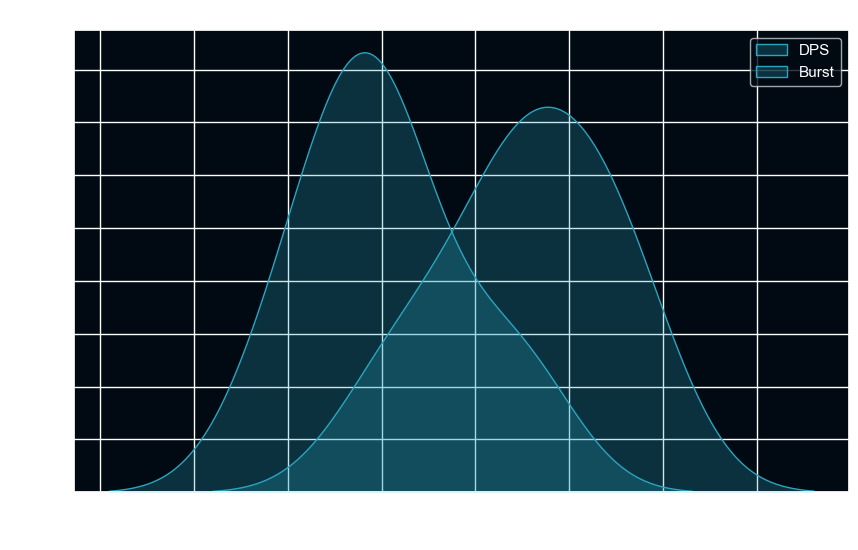

In [357]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=selected_champions, x='Dps', shade=True, label='DPS')
sns.kdeplot(data=selected_champions, x='Burst', shade=True, label='Burst')
plt.title('Distribution de Densité du DPS et du Burst des Champions Sélectionnés')
plt.xlabel('Score')
plt.legend()
plt.show()

In [358]:
from scipy.spatial import distance

# Statistiques fournies par l'utilisateur
user_stats = {
    "Ad": 5.4,
    "Ap": 2.2,
    "Early": 3.8,
    "MidGame": 7.6,
    "Lategame": 7.6,
    "Snowball": 4.8,
    "Escarmouche": 7.6,
    "Teamfight": 6.0,
    "CC": 7.4,
    "Burst": 6.4,
    "Dps": 2.6,
    "Range": 4.6,
    "Mobilité": 4.0,
    "SplitPush": 4.8
}

# Remplacer les valeurs NaN par des valeurs par défaut (0 dans ce cas)
champions_data_cleaned = data_champions.fillna(0)

# Sélectionner les colonnes pertinentes pour la comparaison
stats_columns = list(user_stats.keys())
champions_stats_cleaned = champions_data_cleaned[stats_columns]

# Calculer la distance euclidienne entre chaque champion et les statistiques de l'utilisateur
distances_cleaned = champions_stats_cleaned.apply(lambda row: distance.euclidean(row, list(user_stats.values())), axis=1)

# Ajouter les distances nettoyées au DataFrame et trier les champions en fonction de leur proximité
champions_data_cleaned['Distance'] = distances_cleaned
closest_champions_cleaned = champions_data_cleaned.sort_values(by='Distance')

# Afficher les champions les plus proches
closest_champions = closest_champions_cleaned[['Nom du Champion', 'Distance']].head(20)
print(closest_champions)


    Nom du Champion  Distance
127       TahmKench  6.053098
96            Poppy  6.327717
145              Vi  6.483826
139           Urgot  6.560488
17            Briar  6.726069
90         Nocturne  6.858571
39           Graves  7.144228
102          RekSai  7.445804
21          Chogath  7.525955
116            Shen  7.863841
16            Braum  7.901899
75         Malphite  7.914544
7             Annie  8.114185
0            Aatrox  8.175573
19          Camille  8.212186
150         Warwick  8.248636
64             Kled  8.272847
111         Sejuani  8.392854
98           Qiyana  8.627862
52           Ksante  8.662563


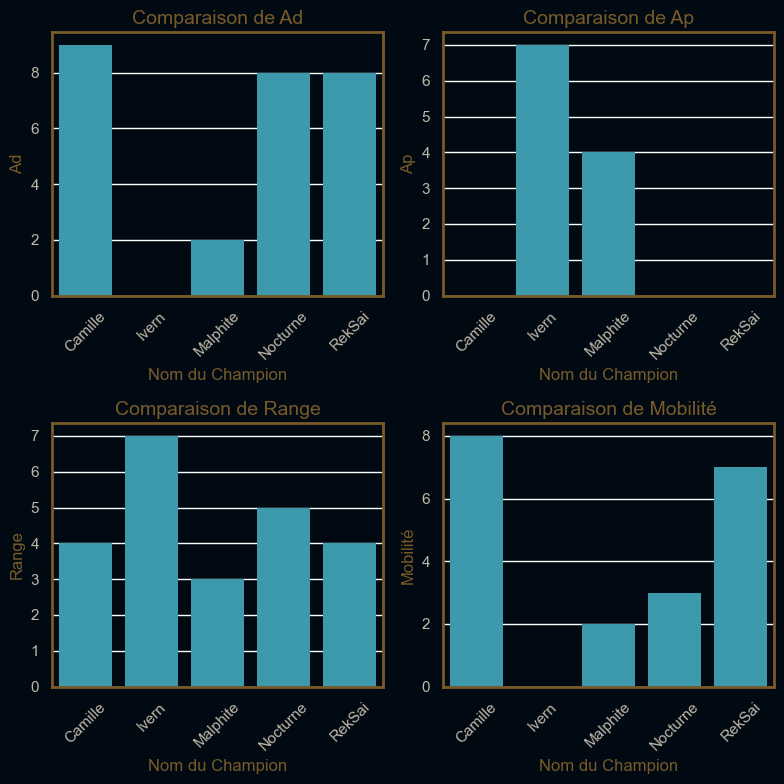

In [359]:
import seaborn as sns

# Chargement des données
champions_data = pd.read_csv('data/Champions_LoL_Reorganized.csv')
selected_champions = ['RekSai', 'Malphite', 'Ivern', 'Camille', 'Nocturne']
selected_data = champions_data[champions_data['Nom du Champion'].isin(selected_champions)]

# Fonction pour appliquer les couleurs
def color_barplot(x, y, data, ax):
    bars = sns.barplot(x=x, y=y, data=data, ax=ax)
    for bar in bars.patches:
        bar.set_color('yellow' if bar.get_height() <= 5 else 'blue')

# Graphique des attributs de base avec conditions de couleur
basic_attributes = ['Ad', 'Ap', 'Range', 'Mobilité']

# Définir les couleurs
bar_color = "#2AA5BF"
background_color = '#010A13'
text_color = '#785A28'
label_color = '#BFB7A7'

# Fonction pour créer un barplot avec le style spécifié
def color_barplot(x, y, data, ax):
    bars = sns.barplot(x=x, y=y, data=data, color=bar_color, linewidth=0, ax=ax)

    # Personnaliser le fond et les bordures du graphique
    bars.figure.patch.set_facecolor(background_color)
    bars.axes.set_facecolor(background_color)
    for spine in bars.spines.values():
        spine.set_color(text_color)
        spine.set_linewidth(2)

    # Personnaliser les étiquettes des axes
    bars.set_xlabel(x, color=text_color)
    bars.set_ylabel(y, color=text_color)
    plt.xticks(rotation=45, color=label_color)
    plt.yticks(color=label_color)

# Création du graphique avec les styles définis
plt.figure(figsize=(8, 8))

for i, attribute in enumerate(basic_attributes, 1):
    ax = plt.subplot(2, 2, i)
    color_barplot(x='Nom du Champion', y=attribute, data=selected_data, ax=ax)
    plt.title(f'Comparaison de {attribute}', color=text_color, fontsize=14)

plt.tight_layout()
plt.show()


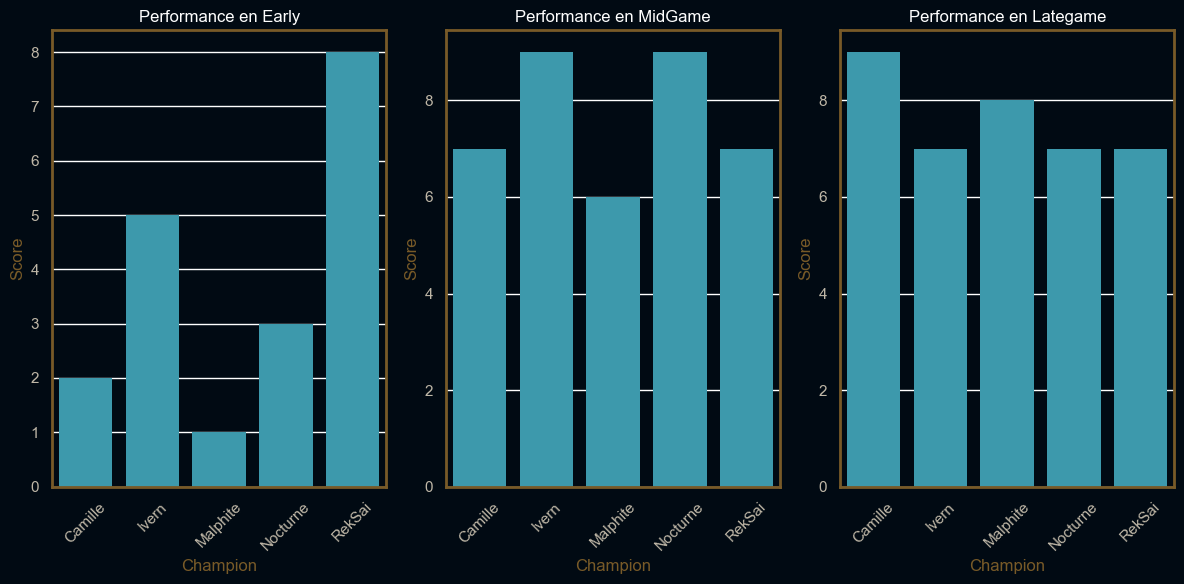

In [360]:
# Graphique de la performance à différents stades du jeu avec conditions de couleur
game_stages = ['Early', 'MidGame', 'Lategame']
plt.figure(figsize=(12, 6))

for i, stage in enumerate(game_stages, 1):
    ax = plt.subplot(1, 3, i)
    color_barplot(x='Nom du Champion', y=stage, data=selected_data, ax=ax)
    plt.title(f'Performance en {stage}')
    plt.ylabel('Score')
    plt.xlabel('Champion')

plt.tight_layout()
plt.show()


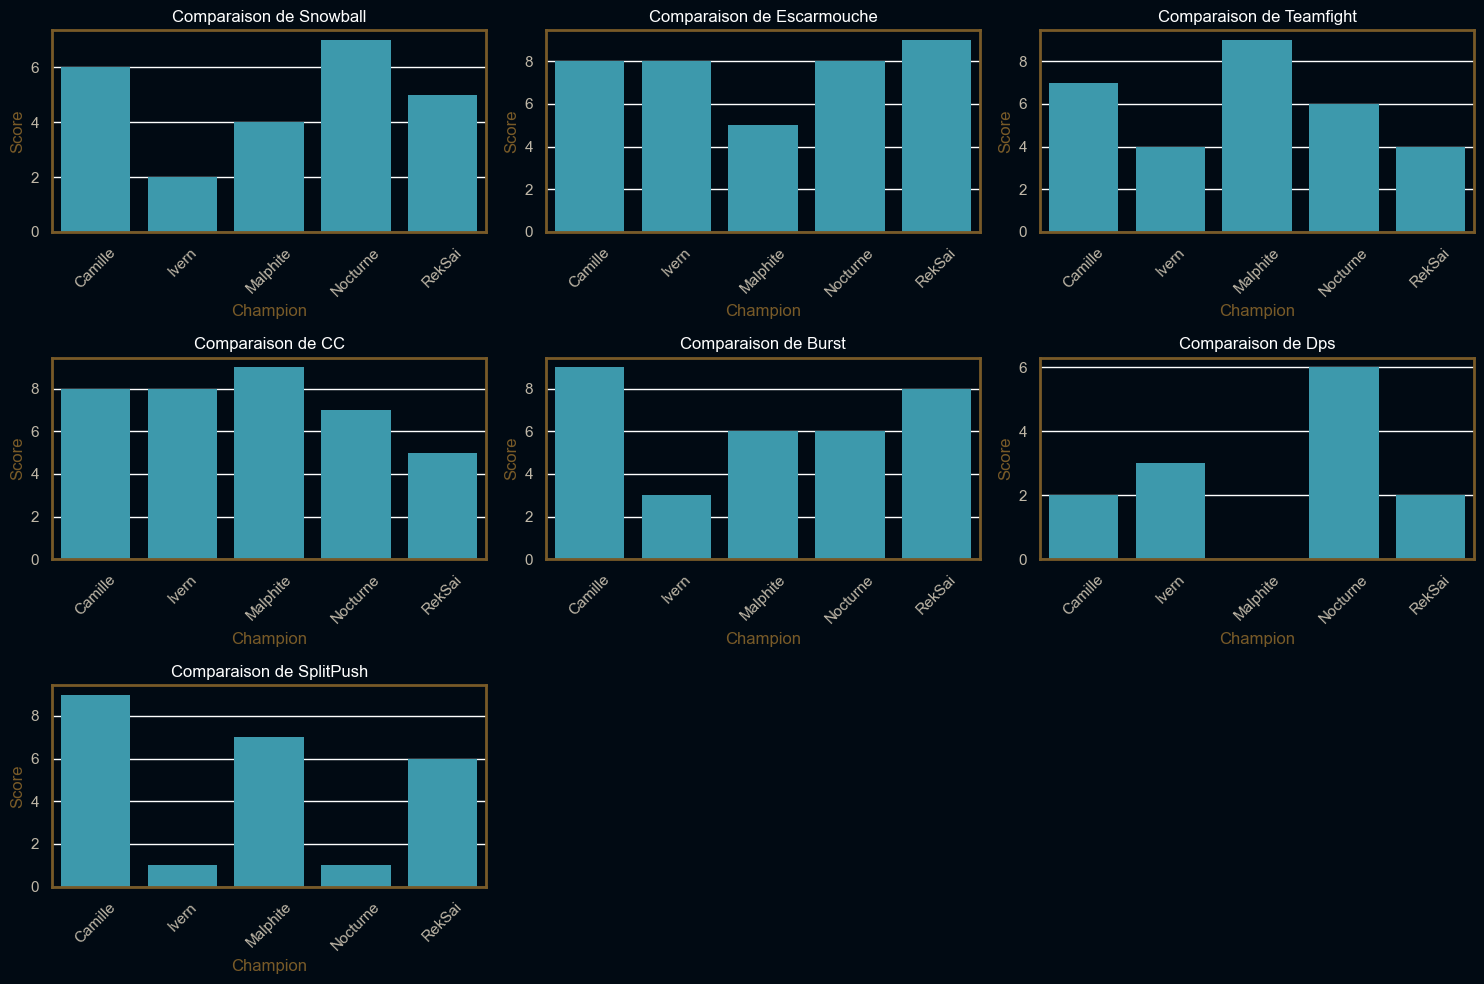

In [361]:
# Graphique des capacités spécifiques avec conditions de couleur
specific_abilities = ['Snowball', 'Escarmouche', 'Teamfight', 'CC', 'Burst', 'Dps', 'SplitPush']
plt.figure(figsize=(15, 10))

for i, ability in enumerate(specific_abilities, 1):
    ax = plt.subplot(3, 3, i)
    color_barplot(x='Nom du Champion', y=ability, data=selected_data, ax=ax)
    plt.title(f'Comparaison de {ability}')
    plt.ylabel('Score')
    plt.xlabel('Champion')

plt.tight_layout()
plt.show()


In [362]:


# Supposons que 'top_counters' contienne les noms des 5 champions sélectionnés
top_counters = ['Sylas', 'Caitlyn', 'Vayne', 'Maokai', 'Hecarim']

# Filtrer les données pour ne garder que les champions sélectionnés
selected_champions = lol_data[lol_data['Nom du Champion'].isin(top_counters)]

# Attributs à comparer
attributes = ['Ad', 'Ap', 'Early', 'MidGame', 'Lategame', 'Snowball', 'Escarmouche', 'Teamfight', 'CC', 'Burst', 'Dps', 'Range', 'Mobilité', 'SplitPush']

# Fusionner les données en une forme longue pour seaborn
melted_data = pd.melt(selected_champions, id_vars='Nom du Champion', value_vars=attributes, var_name='Attribute', value_name='Value')

# Création des diagrammes en boîte
plt.figure(figsize=(20, 10))
sns.boxplot(x='Attribute', y='Value', data=melted_data, palette='Blues')
plt.xticks(rotation=45)
plt.title('Distribution des Attributs des Champions Sélectionnés')
plt.show()


NameError: name 'lol_data' is not defined

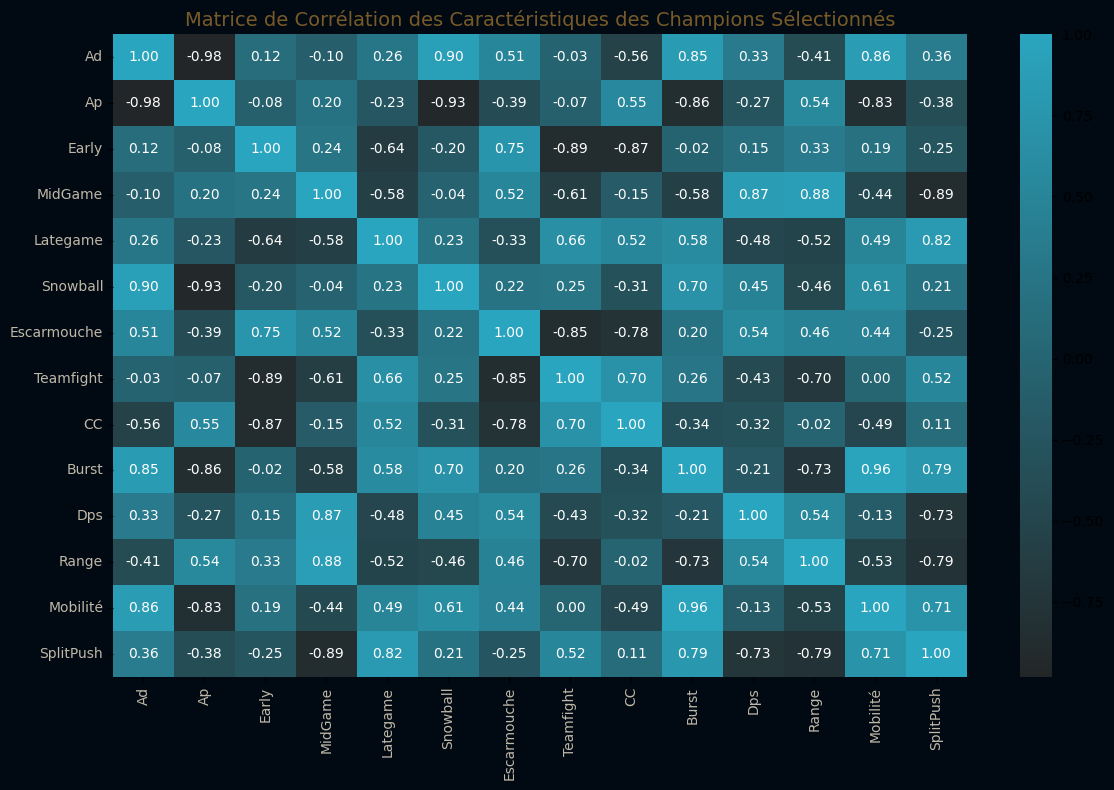

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
file_path = 'data/Champions_LoL_Reorganized.csv'
lol_data = pd.read_csv(file_path)

# Liste des champions spécifiés
top_counters = ['RekSai', 'Malphite', 'Ivern', 'Camille', 'Nocturne']

# Extraction des données pour les champions spécifiés
selected_champions_data = lol_data[lol_data['Nom du Champion'].isin(top_counters)]

# Sélection des colonnes pertinentes pour la corrélation
correlation_data = selected_champions_data.drop(['Nom du Champion', 'Id', 'Rôle principal'], axis=1)

# Calcul de la matrice de corrélation
corr_matrix = correlation_data.corr()

# Définir les couleurs et le style
bar_color = "#2AA5BF"
background_color = '#010A13'
text_color = '#785A28'
label_color = '#BFB7A7'
custom_blue_palette = sns.dark_palette("#2AA5BF", reverse=False, as_cmap=True)


# Création du heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 8), facecolor=background_color)
sns.heatmap(corr_matrix, annot=True, cmap=custom_blue_palette, fmt=".2f")


# Personnalisation du fond et des bordures du graphique
ax = plt.gca()  # Accéder aux axes actuels
ax.set_facecolor(background_color)
for spine in ax.spines.values():
    spine.set_edgecolor(text_color)
    spine.set_linewidth(2)

# Titre
plt.title("Matrice de Corrélation des Caractéristiques des Champions Sélectionnés", fontsize=14, color=text_color)

# Configuration des étiquettes des axes
plt.xticks(color=label_color)
plt.yticks(color=label_color)

# Ajuster les marges et afficher le graphique
plt.tight_layout()
plt.show()


C:\Users\yifor\AppData\Local\Temp\ipykernel_27492\2032777857.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_xticklabels(bars.get_xticklabels(), rotation=45, color=label_color)
C:\Users\yifor\AppData\Local\Temp\ipykernel_27492\2032777857.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bars.set_yticklabels(bars.get_yticks(), color=label_color)


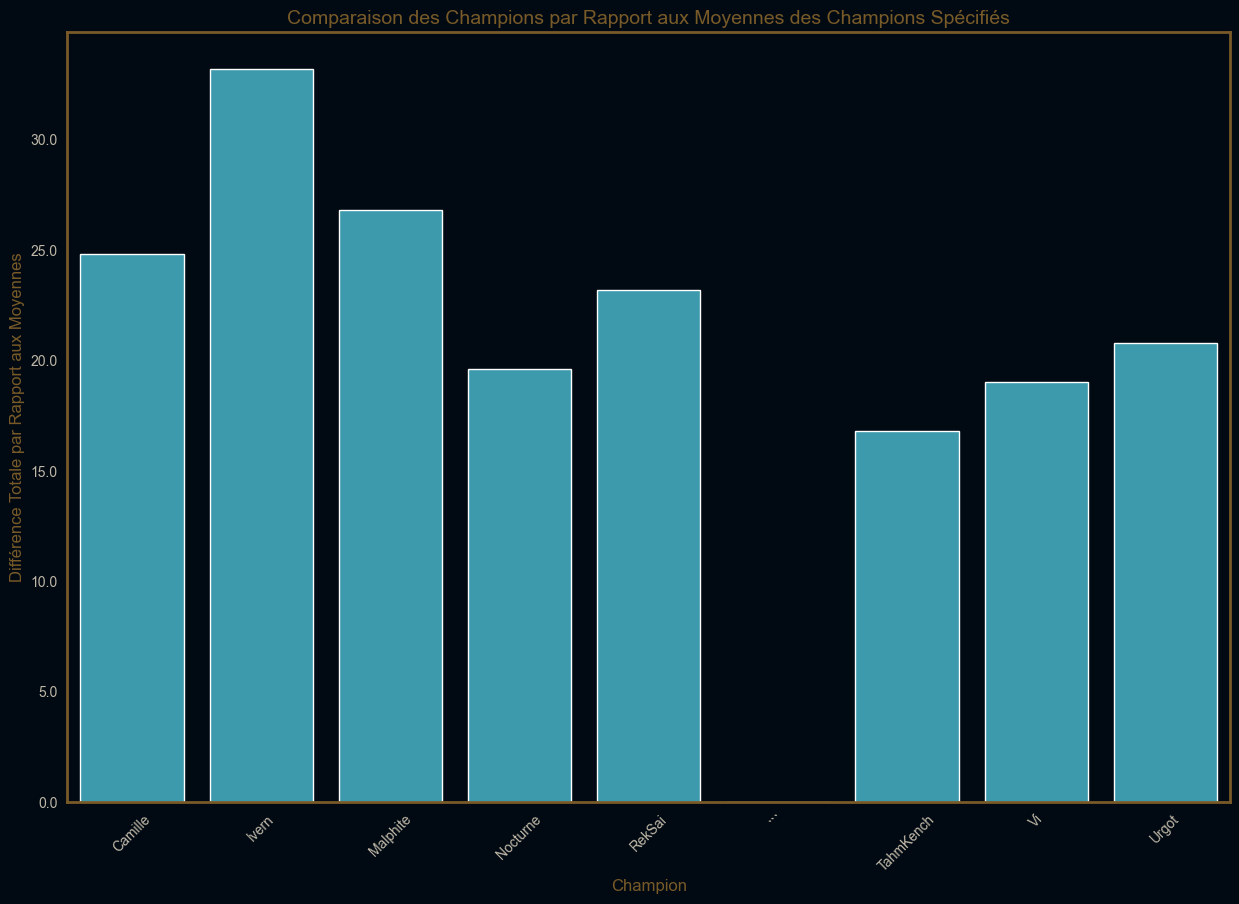

In [ ]:
# Extraction des données pour les champions spécifiés
selected_champions_data = lol_data[lol_data['Nom du Champion'].isin(top_counters)]
correlation_data = selected_champions_data.drop(['Nom du Champion', 'Id', 'Rôle principal'], axis=1)

# Calcul des statistiques moyennes pour les champions spécifiés
mean_stats = correlation_data.mean()

# Calcul des différences entre chaque champion du fichier CSV et les moyennes calculées
all_champions_data = lol_data.drop(['Nom du Champion', 'Id', 'Rôle principal'], axis=1)
champions_difference = all_champions_data.apply(lambda x: (x - mean_stats).abs().sum(), axis=1)

# Trouver les champions ayant les statistiques les plus proches des moyennes calculées
closest_champions = champions_difference.nsmallest(5).index
closest_champions_data = lol_data.loc[closest_champions]

# Préparation des données pour le graphique
graph_data = pd.concat([selected_champions_data, closest_champions_data])

# Définir les couleurs
bar_color = "#2AA5BF"
background_color = '#010A13'
text_color = '#785A28'
label_color = '#BFB7A7'

# Création d'un graphique pour visualiser les données avec les personnalisations
plt.figure(figsize=(15, 10))
bars = sns.barplot(data=graph_data, x='Nom du Champion', y=champions_difference.loc[graph_data.index], color=bar_color)

# Personnaliser le fond et les bordures du graphique
bars.figure.patch.set_facecolor(background_color)
bars.axes.set_facecolor(background_color)
for spine in bars.spines.values():
    spine.set_color(text_color)
    spine.set_linewidth(2)

# Personnaliser les titres et étiquettes
bars.set_title('Comparaison des Champions par Rapport aux Moyennes des Champions Spécifiés', color=text_color, fontsize=14)
bars.set_xlabel('Champion', color=text_color, fontsize=12)
bars.set_ylabel('Différence Totale par Rapport aux Moyennes', color=text_color, fontsize=12)

# Personnaliser les étiquettes des axes
bars.set_xticklabels(bars.get_xticklabels(), rotation=45, color=label_color)
bars.set_yticklabels(bars.get_yticks(), color=label_color)

# Afficher le graphique
plt.show()

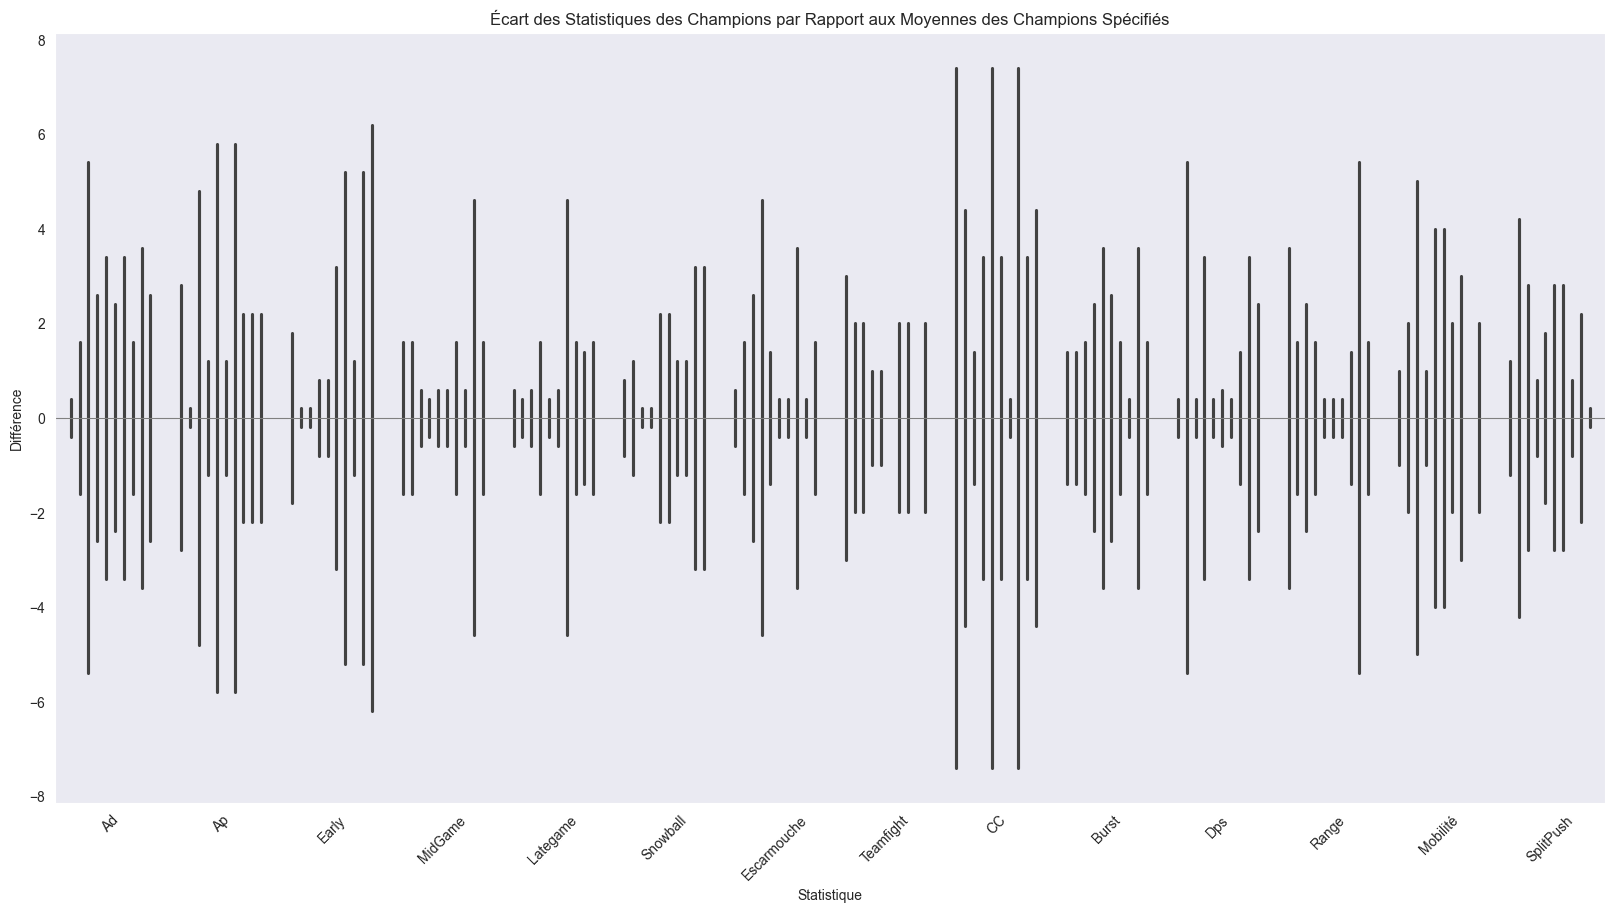

In [ ]:
# Liste des champions spécifiés et préparation des données
top_counters = ['RekSai', 'Malphite', 'Ivern', 'Camille', 'Nocturne']
selected_champions_data = lol_data[lol_data['Nom du Champion'].isin(top_counters)]
mean_stats = selected_champions_data.drop(['Nom du Champion', 'Id', 'Rôle principal'], axis=1).mean()
all_champions_data = lol_data.drop(['Nom du Champion', 'Id', 'Rôle principal'], axis=1)

# Trouver les champions les plus proches pour chaque statistique
differences = all_champions_data.apply(lambda row: (row - mean_stats).abs(), axis=1)
closest_champions_per_stat = differences.idxmin()
closest_champions_data = lol_data.loc[closest_champions_per_stat].drop_duplicates()

# Calcul de la différence entre les moyennes et les champions les plus proches pour chaque statistique
difference_data = closest_champions_data.set_index('Nom du Champion')[mean_stats.index] - mean_stats

# Préparation des données pour le graphique
visualisation_data = pd.concat([difference_data, -difference_data])
visualisation_data['Champion'] = visualisation_data.index
visualisation_data = visualisation_data.reset_index(drop=True)
visualisation_data = visualisation_data.melt(id_vars='Champion', var_name='Statistique', value_name='Différence')

# Création du graphique
plt.figure(figsize=(20, 10))
sns.barplot(data=visualisation_data, x='Statistique', y='Différence', hue='Champion')
plt.title('Écart des Statistiques des Champions par Rapport aux Moyennes des Champions Spécifiés')
plt.xlabel('Statistique')
plt.ylabel('Différence')
plt.axhline(0, color='gray', linewidth=0.8)
plt.xticks(rotation=45)
plt.legend().remove() 
plt.show()

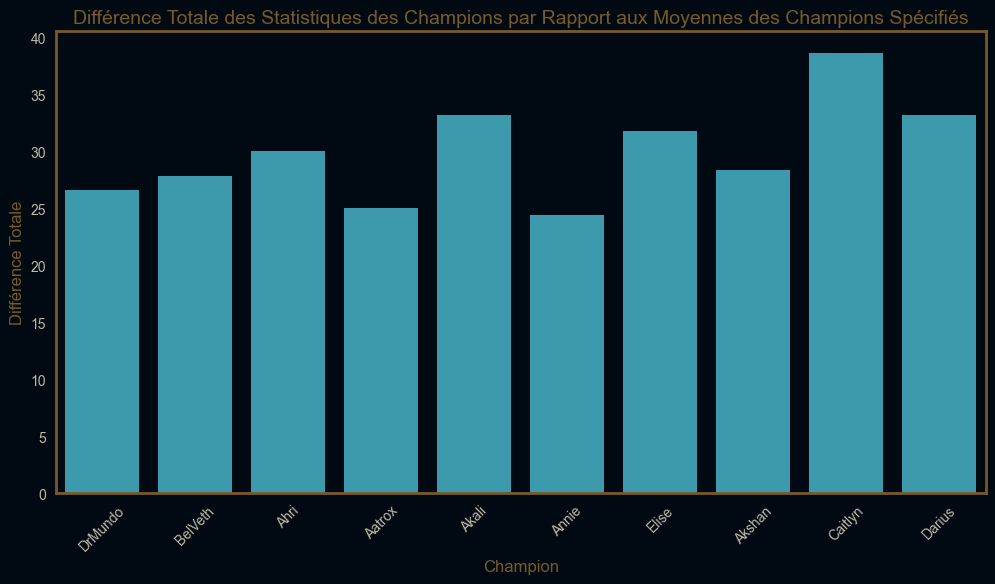

In [ ]:
# Liste des champions spécifiés et préparation des données
top_counters = ['RekSai', 'Malphite', 'Ivern', 'Camille', 'Nocturne']
selected_champions_data = lol_data[lol_data['Nom du Champion'].isin(top_counters)]
mean_stats = selected_champions_data.drop(['Nom du Champion', 'Id', 'Rôle principal'], axis=1).mean()
all_champions_data = lol_data.drop(['Nom du Champion', 'Id', 'Rôle principal'], axis=1)

# Trouver les champions les plus proches pour chaque statistique
differences = all_champions_data.apply(lambda row: (row - mean_stats).abs(), axis=1)
closest_champions_per_stat = differences.idxmin()
closest_champions_data = lol_data.loc[closest_champions_per_stat].drop_duplicates()

# Calcul de la différence totale pour chaque champion
difference_data = closest_champions_data.set_index('Nom du Champion')[mean_stats.index] - mean_stats
difference_totals = difference_data.abs().sum(axis=1)

# Préparation des données pour le graphique
total_difference_data = pd.DataFrame({'Champion': difference_totals.index, 'Différence Totale': difference_totals.values})

# Définir les couleurs
bar_color = "#2AA5BF"
background_color = '#010A13'
text_color = '#785A28'
label_color = '#BFB7A7'

# Création du graphique
plt.figure(figsize=(12, 6))
bars = sns.barplot(data=total_difference_data, x='Champion', y='Différence Totale', color=bar_color, linewidth=0)

# Personnaliser le fond et les bordures du graphique
bars.figure.patch.set_facecolor(background_color)
bars.axes.set_facecolor(background_color)
for spine in bars.spines.values():
    spine.set_color(text_color)
    spine.set_linewidth(2)

# Personnaliser les titres et étiquettes
plt.title('Différence Totale des Statistiques des Champions par Rapport aux Moyennes des Champions Spécifiés', color=text_color, fontsize=14)
plt.xlabel('Champion', color=text_color, fontsize=12)
plt.ylabel('Différence Totale', color=text_color, fontsize=12)

# Personnaliser les étiquettes des axes
plt.xticks(rotation=45, color=label_color)
plt.yticks(color=label_color)

# Afficher le graphique
plt.show()
